# Build Your Own Face Recognition Attendance System with FAISS using 100% local Open-Source

A Step-by-Step Guide to building a custom Face Recognition App
using Facebook AI Similarity Search (Faiss)

- **Author:** Amit Shukla
- **Demo | VideoBlog:** link
- **Connect:** [X](x.com/@ashuklax) [YouTube](youtube.com/@amit.shukla) [GitHub](github.com/AmitXShukla)

## Dive into Faiss: A Powerful Tool for Efficient Vector Search

In this notebook, we'll explore the core concepts of Faiss and its practical application in vector search. We'll start with a hands-on introduction to Faiss, followed by a real-world implementation using a large-scale dataset.

**Why Faiss?**
Faiss is a state-of-the-art library for efficient similarity search and clustering of dense vectors. It's designed to handle massive datasets, offering significant performance improvements over traditional methods.

## use cases: Real-World Applications of Face Recognition

- Streamline Workforce Management:
    - Employee attendance tracking
    - Photo verification
- Enhance Security and Access Control:
    - Visitor management systems
    - Quick staff identification

## Disclaimer

This notebook provides a proof-of-concept demonstration for building a practical face recognition application using open-source technologies.

While this POC effectively handles datasets of up to `10,000 images` and delivers results within `7-10 seconds on a CPU`,
it can be further optimized using GPUs and other techniques to achieve enterprise-grade performance.

Please feel free to comment on this blog if you're interested in collaborating or deploying a Pro-level production-ready version of this application. 

# Code

## getting started with FAISS

In [2]:
## FAISS installation

## Please note that the following command is for CPU-only installations.
## For GPU-accelerated performance, refer to the specific GPU installation
##  instructions provided in the Faiss documentation.

# !pip install faiss-cpu

In [15]:
# import packages

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import faiss

In [ ]:
# getting started with basic of FAISS

d = 2                       # dimension
nb = 5                      # database size
nq = 1                       # nb of queries

xb1 = np.array([[0.1, 0.1],
       [0.2, 0.2],
       [0.3, 0.3],
       [0.4, 0.4],
       [0.5, 0.5],
       [0.9, 0.9]
       ]).astype('float32')

xq1 = np.array([[0.91, 0.91]]).astype('float32')

In [ ]:
index = faiss.IndexFlatL2(d)   # build the index
print(index.is_trained)
index.add(xb1)                  # add vectors to the index
print(index.ntotal)

True
6


In [5]:
k = 2                          # we want to see 4 nearest neighbors
D, I = index.search(xq1, k) # sanity check
print(I)
print(D)
# D, I = index.search(xq, k)     # actual search
# print(I[:5])                   # neighbors of the 5 first queries
# print(I[-5:])                  # neighbors of the 5 last queries

# when xq = 0.75
# [[5 4]]
# [[0.0288     0.15679997]]

[[5 4]]
[[2.0000200e-04 3.3620003e-01]]


In [6]:
len(xb1[:1][0])

2

In [7]:
# working with more complex dataset

d = 1000                       # dimension
nb = 1000000                      # database size
nq = 1                       # nb of queries
np.random.seed(1234)             # make reproducible
xb = np.random.random((nb, d)).astype('float32')
xb[:, 0] += np.arange(nb) / 5.
xq = np.random.random((nq, d)).astype('float32')
xq[:, 0] += np.arange(nq) / 1000.

In [8]:
k = 2                          # we want to see 4 nearest neighbors
D, I = index.search(xq1, k) # sanity check
print(I)
print(D)

[[5 4]]
[[2.0000200e-04 3.3620003e-01]]


## working with a small RGB pixel image

In [9]:
# Create a 2x2 image with RGB values
# Each pixel is represented as [R, G, B]
image_array = np.array([
    [[255, 0, 0], [0, 255, 0]],  # Pixel (0,0) is Red, Pixel (0,1) is Green
    [[0, 0, 255], [255, 255, 0]]  # Pixel (1,0) is Blue, Pixel (1,1) is Yellow
])

print(image_array)
image_array.shape

[[[255   0   0]
  [  0 255   0]]

 [[  0   0 255]
  [255 255   0]]]


(2, 2, 3)

In [10]:
# Create a 2x2 image with RGB values
image_array = np.array([
    [[255, 0, 0], [0, 255, 0]],  # Pixel (0,0) is Red, Pixel (0,1) is Green
    [[0, 0, 255], [255, 255, 0]]  # Pixel (1,0) is Blue, Pixel (1,1) is Yellow
])

# Flatten the image array to a 1D vector
vector_row = image_array.reshape(-1)
print(vector_row)

[255   0   0   0 255   0   0   0 255 255 255   0]


In [ ]:
# Create a 3x4 image with RGB values
# Each pixel is represented as [R, G, B]
image_array = np.array([
    [[255, 0, 0], [0, 255, 0], [0, 0, 255], [255, 255, 0]],  # Row 1: Red, Green, Blue, Yellow
    [[255, 0, 255], [0, 255, 255], [192, 192, 192], [128, 128, 128]],  # Row 2: Magenta, Cyan, Silver, Gray
    [[255, 165, 0], [255, 20, 147], [0, 128, 0], [75, 0, 130]]   # Row 3: Orange, Deep Pink, Green, Indigo
])

print(image_array)

[[[255   0   0]
  [  0 255   0]
  [  0   0 255]
  [255 255   0]]

 [[255   0 255]
  [  0 255 255]
  [192 192 192]
  [128 128 128]]

 [[255 165   0]
  [255  20 147]
  [  0 128   0]
  [ 75   0 130]]]


## working with an image sample to test FAISS search on image samples

In [12]:
# Create a 2x2 image with RGB values
image_array_R = np.array([
    [[255, 0, 0], [255, 0, 0]],
    [[255, 0, 0], [255, 0, 0]]
])
image_array_G = np.array([
    [[0, 255, 0], [0, 255, 0]],
    [[0, 255, 0], [0, 255, 0]]
])
image_array_B = np.array([
    [[0, 0, 255], [0, 0, 255]],
    [[0, 0, 255], [0, 0, 255]]
])

# Flatten the image array to a 1D vector
# vector_row = image_array.reshape(-1)
# print(vector_row)

image_array_b = np.vstack((image_array_R.reshape(-1), image_array_G.reshape(-1), image_array_B.reshape(-1))).astype("float32")
image_array_q = np.array(image_array_B.reshape(1,-1).astype("float32")) # this is query image, needs special reshape param

In [13]:
image_array_R.shape

(2, 2, 3)

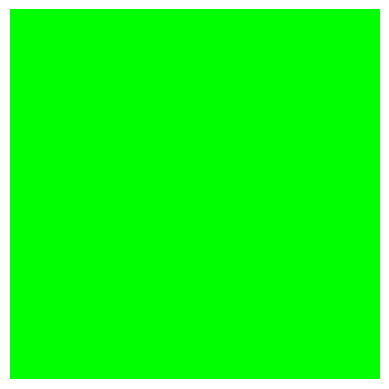

In [16]:
# Display the image using matplotlib
plt.imshow(image_array_G)
plt.axis('off')  # Hide the axis
plt.show()

In [17]:
d = 12
index = faiss.IndexFlatL2(d)   # build the index
print(index.is_trained)
index.add(image_array_b)                  # add vectors to the index
print(index.ntotal)

True
3


In [18]:
# search for red pixel image
k = 1                          # we want to see 1 nearest neighbors
D, I = index.search(image_array_q, k)
print(I)
print(D)

[[2]]
[[0.]]


## working with a large RGB real image

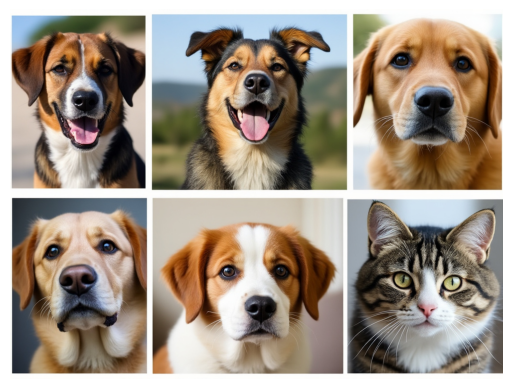

In [19]:
# Load the image
image_path = './image.jpg'  # Replace with your image path
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

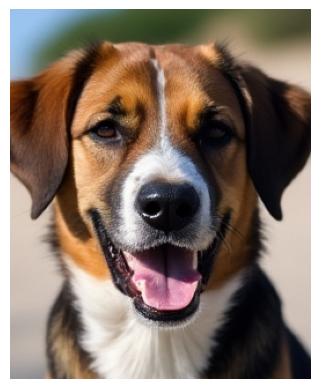

In [20]:
# Define the box to crop (left, upper, right, lower)
box1 = (20, 20, 280, 340)  # Adjust these values as needed
cropped_image1 = image.crop(box1)
# Define the box to crop (left, upper, right, lower)
box2 = (20, 400, 280, 750)  # Adjust these values as needed
cropped_image2 = image.crop(box2)

# Display the cropped image
plt.imshow(cropped_image1)
plt.axis('off')  # Hide axes
plt.show()

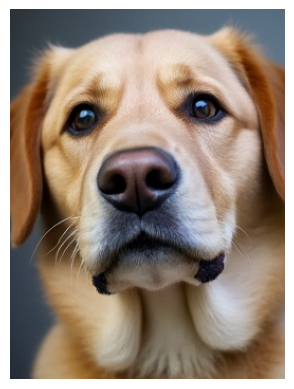

In [ ]:
# Display the cropped image
plt.imshow(cropped_image2)
plt.axis('off')  # Hide axes
plt.show()

In [22]:
image.size, cropped_image1.size

((1024, 768), (260, 320))

In [55]:
img1 = np.array(image)
img2 = np.array(cropped_image1)
img1.shape, img2.shape

((768, 1024, 3), (320, 260, 3))

In [31]:
img1[:1,2]

array([[255, 255, 253]], dtype=uint8)

In [22]:
img1

array([[[254, 255, 255],
        [254, 255, 253],
        [255, 255, 253],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[253, 255, 254],
        [253, 255, 254],
        [255, 255, 253],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[253, 255, 254],
        [253, 255, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [252, 254, 253]],

       ...,

       [[255, 255, 253],
        [255, 255, 253],
        [255, 255, 253],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[255, 255, 253],
        [255, 255, 253],
        [255, 255, 253],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[255, 255, 253],
        [255, 255, 253],
        [254, 254, 252],
        ...,
        [254, 254, 254],
        [255, 255, 255],
        [255, 255, 255]]

In [23]:
# auto instead of manually cropping images
from PIL import Image

# Load the image
image_path = './image.jpg'  # Replace with your image path
image = Image.open(image_path)

# Get dimensions
width, height = image.size

# Define the size of each cropped image
crop_width = width // 3
crop_height = height // 2

# List to hold cropped images
cropped_images = []

# Crop the image into 6 parts
for i in range(2):  # 2 rows
    for j in range(3):  # 3 columns
        left = j * crop_width
        upper = i * crop_height
        right = left + crop_width
        lower = upper + crop_height
        
        # Crop the image
        cropped_image = image.crop((left, upper, right, lower))
        cropped_images.append(cropped_image)

        # Save the cropped image
        # cropped_image.save(f'cropped_image_{i * 3 + j + 1}.jpg')

print("Images cropped and saved successfully!")


Images cropped and saved successfully!


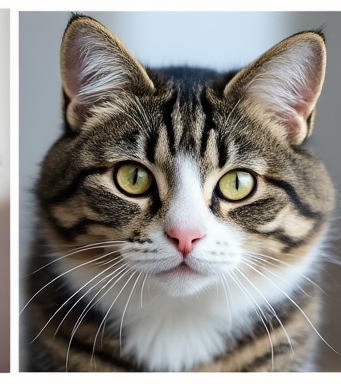

In [24]:
cropped_images[5]

In [25]:
tst = np.array(cropped_images[5])
np.set_printoptions(threshold=100000)  # Default threshold
tst[:1,0]
img1 = np.array(cropped_images[0])
img2 = np.array(cropped_images[1])
img3 = np.array(cropped_images[2])
img4 = np.array(cropped_images[3])
img5 = np.array(cropped_images[4])
img6 = np.array(cropped_images[5])

In [26]:
employee_b = np.vstack((img1.reshape(-1),img2.reshape(-1),img3.reshape(-1),img4.reshape(-1),img5.reshape(-1), img6.reshape(-1))).astype("float32")
employee_q = np.array(img2.reshape(1,-1).astype("float32")) # this is query image, needs special reshape param

In [27]:
d = 392832
import faiss                   # make faiss available
index = faiss.IndexFlatL2(d)   # build the index
print(index.is_trained)
index.add(employee_b)                  # add vectors to the index
print(index.ntotal)
# search for red pixel image
k = 1                          # we want to see 1 nearest neighbors
D, I = index.search(employee_q, k)
print(I)
print(D)

True
6
[[1]]
[[0.]]


In [28]:
employee_b.shape, employee_q.shape

((6, 392832), (1, 392832))

In [29]:
x = img1.reshape(-1)
x

array([254, 255, 255, ..., 254, 254, 252], dtype=uint8)

In [30]:
employee_b

array([[254., 255., 255., ..., 254., 254., 252.],
       [254., 252., 253., ..., 254., 254., 254.],
       [252., 254., 253., ..., 254., 254., 254.],
       [255., 255., 253., ..., 255., 254., 252.],
       [253., 253., 253., ..., 255., 253., 254.],
       [254., 254., 252., ..., 255., 255., 255.]], dtype=float32)

## working with 100,000 images

In [20]:
additional_rows = np.random.randint(1, 256, size=(10, 392832))
additional_rows

array([[242, 254, 227, ..., 178,  22, 236],
       [194,  35, 163, ..., 221, 157, 124],
       [222, 214,  68, ..., 207, 219,  95],
       ...,
       [  4, 144,  88, ..., 163,  13, 237],
       [164,  91, 222, ...,   9,  98, 217],
       [132, 164, 194, ..., 190, 166,  21]])

create 10k fake images to add to index

In [ ]:
sampleSize = 10000
additional_rows = np.random.randint(1, 256, size=(sampleSize, 392832)).astype("float32")

employee_b = np.vstack((img1.reshape(-1),img2.reshape(-1),img3.reshape(-1),img4.reshape(-1),img5.reshape(-1), img6.reshape(-1), additional_rows)).astype("float32")

In [12]:
employee_q = np.array(img4.reshape(1,-1).astype("float32")) # this is query image, needs special reshape param

In [13]:
employee_b.shape, employee_q.shape

((10006, 392832), (1, 392832))

In [14]:
d = 392832
import faiss                   # make faiss available
index = faiss.IndexFlatL2(d)   # build the index
print(index.is_trained)
index.add(employee_b)                  # add vectors to the index
print(index.ntotal)

True
10006


In [15]:
# search for red pixel image
k = 1                          # we want to see 1 nearest neighbors
D, I = index.search(employee_q, k)
print(I)
print(D)

[[3]]
[[0.]]


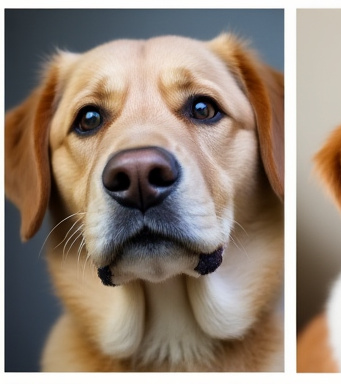

In [20]:
res = I[0][0]
cropped_images[res]

# create an app to handle file upload and dynamically search FAISS Index

1. create a chatbot like app
2. handle upload image (crop and resize to right dimensionality)
3. query search and result
4. display result back

In [25]:
I =  [[0]]
str(I[0][0])

'0'

# Next Steps : building a Pro Enterprise app

- Faster search - index tuning
- running on GPUs
- arranging data to optimize queries